In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import collections
from random import randint
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data = pd.read_csv("Shakespeare_data.csv")

In [3]:
data['sample'] = pd.Series([i for i in range(len(data))])
data['Player'].replace(np.nan, 'Other', inplace=True)

In [4]:
data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,sample
0,1,Henry IV,NaN,NaN,Other,ACT I,0
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.,1
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ...",2
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",3
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",4


### Wordcloud of the highest frequency words across all plays

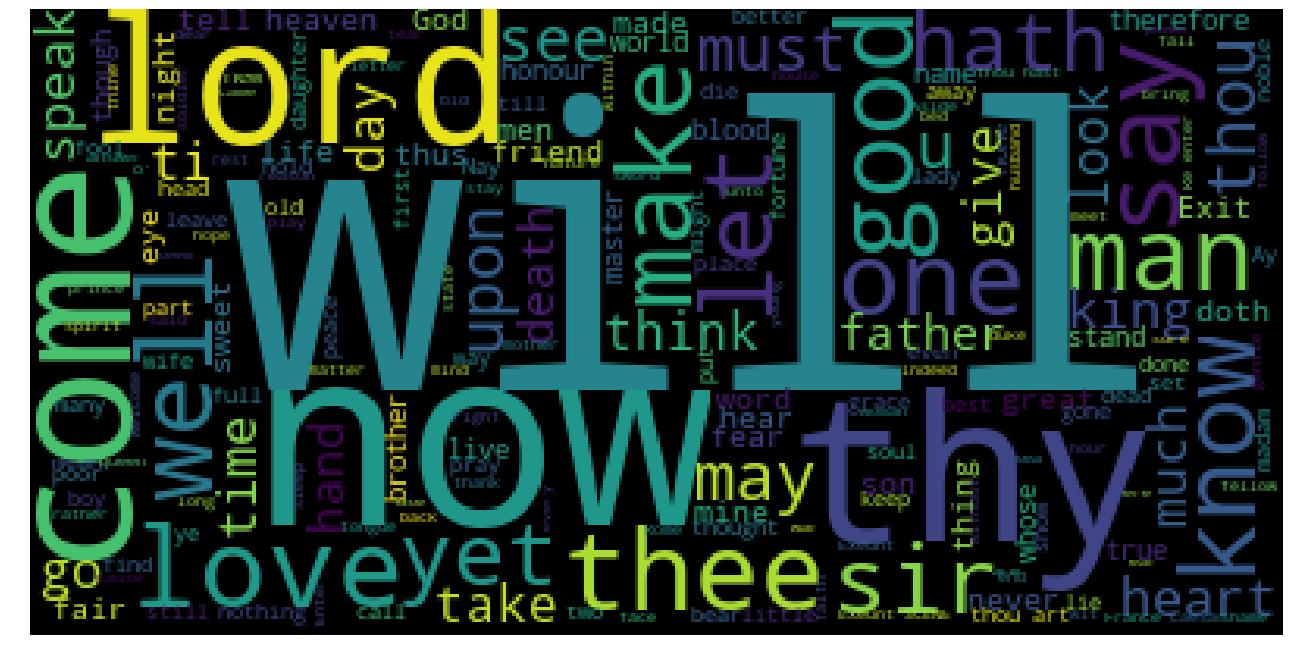

In [5]:
wordcloud = pd.Series(data['PlayerLine'].tolist()).astype(str)

# Most frequent words in the data set. Just because. Using a beautiful wordcloud
from wordcloud import WordCloud 
cloud = WordCloud(margin=1,max_font_size=125).generate(' '.join(wordcloud.astype(str)))
plt.figure(figsize=(20, 20))
plt.imshow(cloud)
plt.axis('off')
plt.show()


# Number of Parts in Each Play

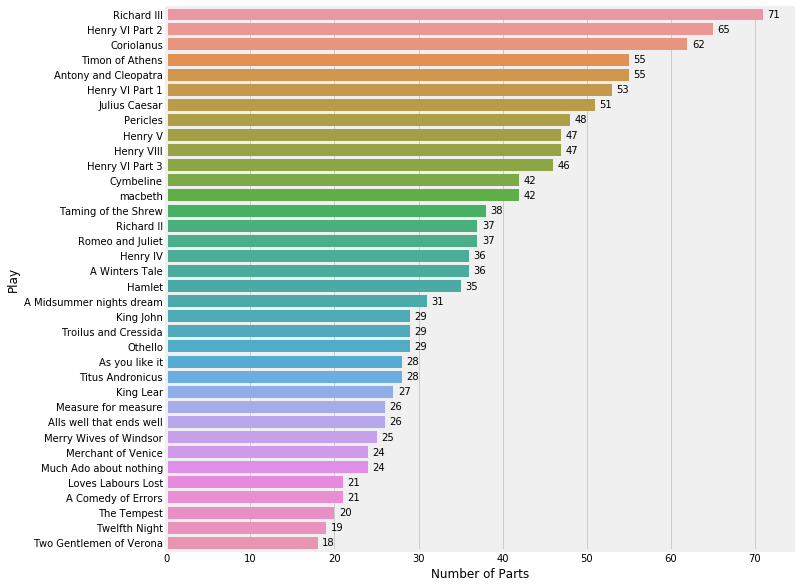

In [6]:
numPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending=False).to_frame()
numPlayers['Play'] = numPlayers.index.tolist()
numPlayers.columns = ['NumPlayers','Play']
numPlayers.index= np.arange(0,len(numPlayers))

plt.figure(figsize=(10,10))
ax = sns.barplot(x='NumPlayers',y='Play',data=numPlayers)
for row in ax.patches:
    ax.text(row.get_width()+1.3,row.get_y()+.6, "%.0f" % row.get_width(), color='black', ha="center")
ax.set(xlabel='Number of Parts', ylabel='Play')
plt.show()

# It seems that there is great diversity in the number of parts in the plays

## Find  the Chattiest Players

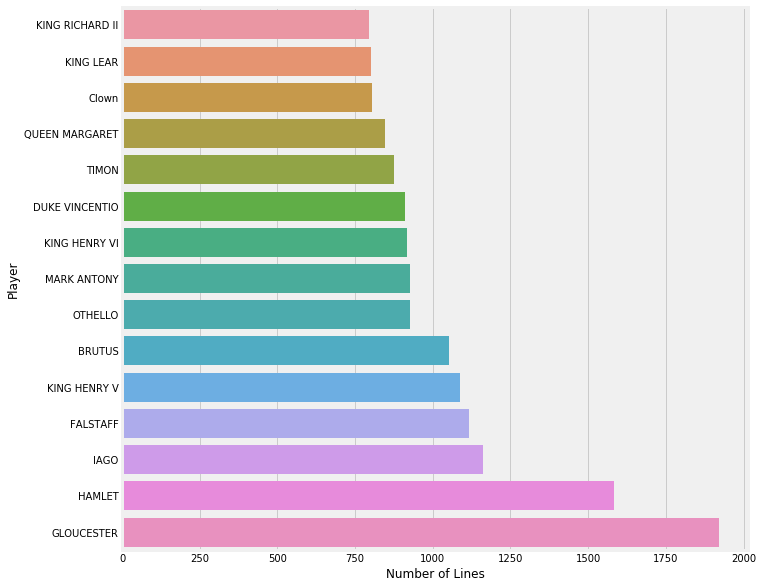

In [8]:
shakes = pd.read_csv("Shakespeare_data.csv")
shakes_t = shakes[pd.notnull(shakes['Player'])]
shakes_t = shakes_t.reset_index(drop = True)
shakes_t['ActSceneLine'] = shakes_t['ActSceneLine'].astype(str)
del shakes_t['Dataline']
import seaborn as sns
chattiestPlayers = shakes_t['Player'].value_counts()
g = chattiestPlayers.sort_values().tail(15).to_frame()
g['Play'] = g.index.tolist()
g
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Player', y='Play',data=g)
ax.set(xlabel='Number of Lines', ylabel='Player')
plt.show()

#### Conclusions: Gloucester is the chattiest player